# Explorando Dados Unidimensionais
O caso mais simples é quando você tem um conjunto de dados unidimensional,
apenas uma coleção de números. Por exemplo, eles poderiam ser a media diária
de minutos que cada usuário passa no seu site, o número de vezes que cada
coleção de vídeos tutoriais de data science foi vista ou o número de páginas de
cada livro de data science na sua biblioteca.

Um primeiro passo inevitável é computar algumas estatísticas sumárias. Você
gostaria de saber quantos pontos de dados você tem, o menor, o maior, a média e
o desvio padrão.

Mas nem isso tudo fornece, necessariamente, um bom entendimento. Um
próximo passo adequado é criar um histograma para agrupar seus dados em
agrupamentos (buckets) discretos e contar quantos pontos vão para cada um:

In [71]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat

df = pd.read_csv('2015.csv')
# Conjunto resumido para treinamento de modelos
world_happiness_resumido = df.loc[:,[ 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]

# verificar tipos de dados

In [57]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# verificar nulos

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Verificando dados ausentes
Dados ausentes são representados como np.NaN

São dados nulos ou não preenchidos

A função isnull verifica se os dados existem (True) ou não (False)

Há também a função isna, que é idêntica a isnull

CUIDADO: além de dados nulos há também dados que tendem ao infinito (inf ou -inf), fruto, por exemplo, de divisão por zero. Para que sejam considerados nulos usar pandas.options.mode.use_inf_as_na = True

In [59]:
# Verificar nulos
pd.options.mode.use_inf_as_na = True
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [60]:
# Para listar dados nulos
df[df.isnull().any(axis=1)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


# Contagem de valores (categóricos ou numéricos)

In [61]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [62]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [63]:
df.groupby('Region').agg({'Country' : 'count', 'Happiness Rank' : 'mean',
                          'Happiness Score' : 'mean'}).sort_values(by=['Happiness Score'], ascending=False)

,Country,Happiness Rank,Happiness Score
Region,,,
Australia and New Zealand,2,9.500000,7.285000
North America,2,10.000000,7.273000
Western Europe,21,29.523810,6.689619
Latin America and Caribbean,22,46.909091,6.144682
Eastern Asia,6,64.500000,5.626167
Middle East and Northern Africa,20,77.600000,5.406900
Central and Eastern Europe,29,79.000000,5.332931
Southeastern Asia,9,81.222222,5.317444
Southern Asia,7,113.142857,4.580857


In [65]:
# Observar a duplicidade de valores

df['Happiness Rank'].value_counts().head()

82     2
158    1
50     1
57     1
56     1
Name: Happiness Rank, dtype: int64

# Estatísticas gerais
Observação sobre medidas de forma: Curtose (achatamento, onde 0 caracteriza a normal, maior que 0 representa afunilamento e menor que 0 achatamento) e Assimetria (skewness, onde 0 caracteriza simetria, maior que 0 caracteriza maior distribuição à direira e menor que 0 caracteriza maior distribuição à esquerda)

In [73]:
DescribeResult = stat.describe(world_happiness_resumido)
minmax = DescribeResult[1]
mean = DescribeResult[2]
variance = DescribeResult[3]
skewness = DescribeResult[4]
kurtosis = DescribeResult[5]

kurtosis

array([-0.78946809, -0.87752801,  0.8522629 , -0.41931461, -0.48406127,
        1.30361487,  1.65400948])

In [75]:
DescribeResult

DescribeResult(nobs=158, minmax=(array([2.839, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]), array([7.587  , 1.69042, 1.40223, 1.02525, 0.66973, 0.55191, 0.79588])), mean=array([5.37573418, 0.84613722, 0.99104595, 0.63025937, 0.42861494,
       0.14342184, 0.23729551]), variance=array([1.31104821, 0.16250636, 0.07418492, 0.06104742, 0.02270832,
       0.01440818, 0.01604907]), skewness=array([ 0.09683845, -0.31455172, -0.99730869, -0.69861459, -0.4095263 ,
        1.37227463,  0.99242309]), kurtosis=array([-0.78946809, -0.87752801,  0.8522629 , -0.41931461, -0.48406127,
        1.30361487,  1.65400948]))

# 4.2 - Visualização para análise de dados

Plotar variável X índice
Pode trazer informações interessantes de tendência se plotarmos variável X índice, mesmo que não trabalhemos com séries temporais.

No mínimo verificaremos se os dados foram embaralhados

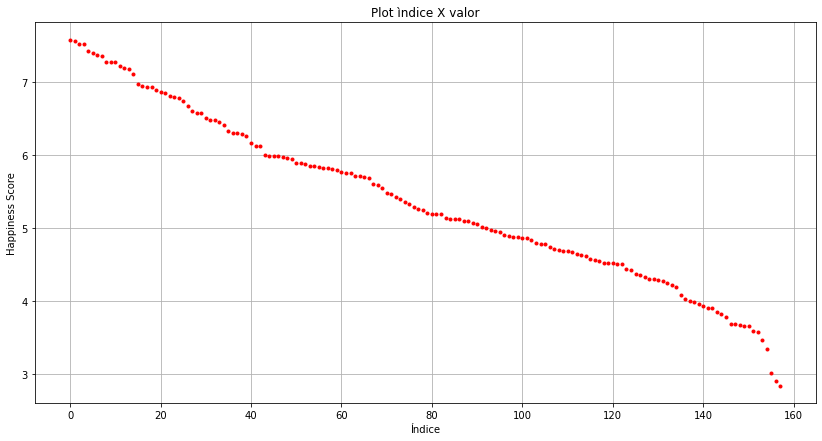

<Figure size 432x288 with 0 Axes>

In [79]:
plt.subplots(figsize=(14,7))
plt.plot(range(len(df)), 
         df.loc[:,['Happiness Score']],
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('Happiness Score')
plt.title('Plot ìndice X valor')
plt.grid(True)
plt.show()
plt.tight_layout()

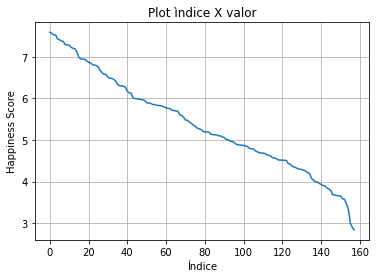

<Figure size 432x288 with 0 Axes>

In [83]:
df['Happiness Score'].plot()
plt.xlabel('Índice')
plt.ylabel('Happiness Score')
plt.title('Plot ìndice X valor')
plt.grid(True)
plt.show()
plt.tight_layout()

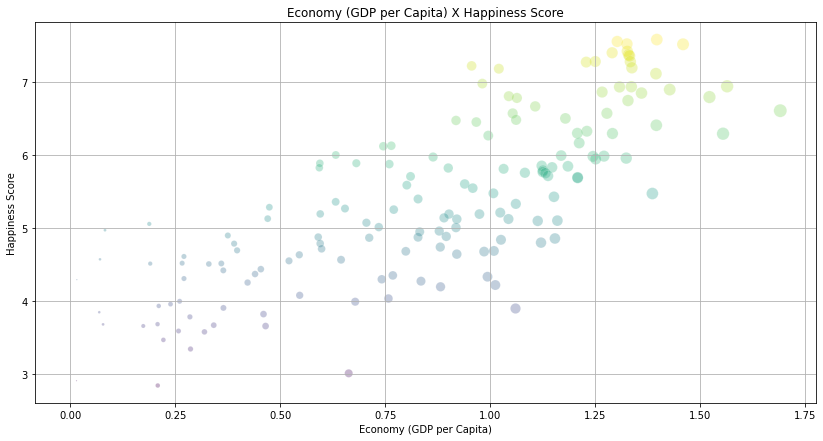

In [106]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x=df['Economy (GDP per Capita)'].values, y='Happiness Score', c=df['Happiness Score'].values,
                cmap='viridis', s=df['Economy (GDP per Capita)']*100, alpha=0.3)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Economy (GDP per Capita) X Happiness Score')
plt.grid(True) 
plt.show()

<ipython-input-109-ddf530f14437>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  world_happiness_resumido.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,


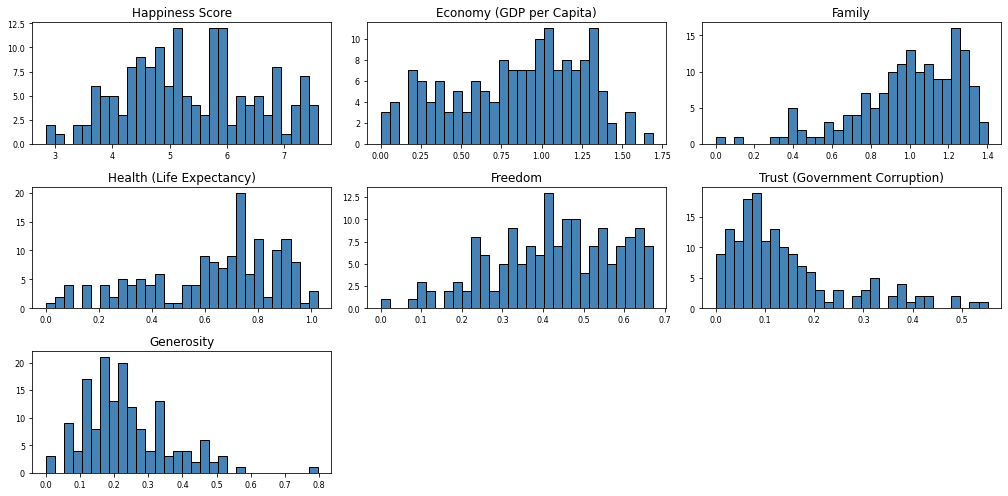

In [109]:
# Histograma dos dados

fig, ax = plt.subplots(1, 1, figsize=(14,7))

world_happiness_resumido.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout()   

NameError: name 'people' is not defined

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073,
       5.057, 5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876,
       4.874, 4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715,
       4.694, 4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565,
       4.55 , 4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369,
       4.35 , 4.332,